In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
from functools import wraps, partial
import numpy as np

# 4.List to PMF

In [2]:
def sorted_dictionary(func):
    @wraps(func)
    def inner(*args,**kwargs):
        return dict(sorted(func(*args,**kwargs).items()))
    return inner

In [3]:
@sorted_dictionary
def list_to_pmf(series):
    n = len(series)
    d = {}
    counts = Counter(series)
    for _, key in enumerate(counts):
        d[key] = counts[key]/n
    return d

### 4b

In [4]:
@sorted_dictionary
def list_to_pmf_2(series):
    n = len(series)
    d = {}
    for i in series:
        if i in d.keys():
            d[i]+=1/n
        else:
            d[i]=1/n
    return d

# 5. Plotting the PMF

In [44]:
a = np.random.randint(0,10,size=(1,10)).tolist()[0]

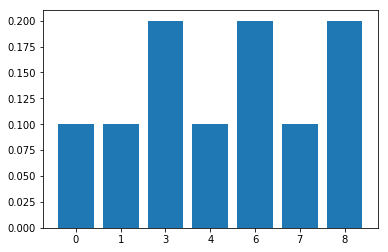

In [45]:
pmf = list_to_pmf(a)

_ = plt.bar(range(len(pmf)), list(pmf.values()))
_ = plt.xticks(range(len(pmf)), list(pmf.keys()))

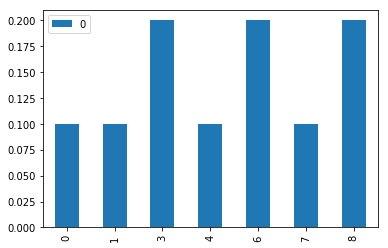

In [46]:
pmf_df = pd.DataFrame.from_dict(pmf, orient='index')
_ = pmf_df.plot.bar()

### List to CDF

In [82]:
def list_to_cdf(series):
    pmf = list_to_pmf(series)
    cumsum = 0
    percentiles = {}
    for x,value in pmf.items():
        cumsum += value
        percentiles[x]=cumsum
    return percentiles

### Plotting the CDF

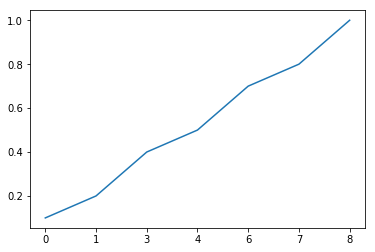

In [48]:
cdf = list_to_cdf(a)
_ = plt.plot(range(len(cdf)), list(cdf.values()))
_ = plt.xticks(range(len(cdf)), list(cdf.keys()))

# 6. 

# 7. Percentiles

In [74]:
def percentile(percent, samples, key=lambda x:x):
    """ 
    Find the percentile of a list of values. 
    @parameter N - is a list of values. Note N MUST BE already sorted. 
    @parameter percent - a float value from 0.0 to 1.0. 
    @parameter key - optional key function to compute value from each element of N. 
    @return - the percentile of the values 
    """ 

    if samples is None: 
        return None 

    k = (len(samples)-1) * percent 
    f = math.floor(k) 
    c = math.ceil(k) 

    if f == c:
        return key(samples[int(k)]) 

    d0 = key(samples[int(f)]) * (c-k)
    d1 = key(samples[int(c)]) * (k-f)

    return (d0+d1)

def percentile_2(scores,percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

def inverse_cdf(samples,prob):
    samples.sort()
    index = int(prob * (len(samples)-1))
    return samples[index]

def inverse_cdf_2(cdf_dict, prob):
    for k in cdf_dict:
        if cdf_dict[k]>=prob:
            return k

### 25 Percentile

In [70]:
first_quartile = percentile(0.25,a)
first_quartile

3.0

### 50 Percentile

In [68]:
second_quartile = inverse_cdf(a,0.75)
second_quartile

5.0

### 75 Percentile

In [79]:
third_quartile = inverse_cdf_2(cdf,0.75)
third_quartile

7

In [80]:
third_quartile = percentile(0.75,a)
third_quartile

6.75

In [81]:
cdf

{0: 0.1, 1: 0.2, 3: 0.4, 4: 0.5, 6: 0.7, 7: 0.7999999999999999, 8: 1.0}

### Comments
The x percentile ,i.e , the first number greater than x percent of the sample is the same as the inverse of the CDF function. The inverse CDF calculated from the dictionary output of the CDF function might yeild higher than normal results because  of the binning effect of frequency counts.

# 8. Partial function for 25 percentile

In [64]:
first_quartile = partial(percentile,0.25,key=lambda x:x)
a.sort()
first_quartile(a)

3.0